## Read data

In [7]:
library("h5")
DATASET_DIR = "~/seungmount/research/Jingpeng/14_zfish/01_data/20190415"
f = h5file(file.path(DATASET_DIR,"evaluate3.h5"), mode="r")
neuronIdList = f["/neuronIdList"][]
groundTruthPartition = f["/groundTruthPartition"][]

flyTableDistanceMatrix = - f["flyTable/meanSimilarityMatrix"][]
zfishTableDistanceMatrix = - f["zfishTable/meanSimilarityMatrix"][]
semanticDistanceMatrix = - f["zfishTable/semantic/meanSimilarityMatrix"][]

small2bigDistanceMatrix = - f["zfishTable/small2big/similarityMatrix"][]
semanticSmall2bigDistanceMatrix = - f["zfishTable/semantic/small2big/similarityMatrix"][]

h5close(f)

## Clustering

In [8]:
# Affinity Propagation clustering
# library(apcluster)
# apres <- apcluster(small2bigDistanceMatrix, details=TRUE)
# show(apres)

In [9]:
library("dendextend")
library("dynamicTreeCut")
library(FreeSortR)
distanceMatrix = flyTableDistanceMatrix

evaluate <- function (distanceMatrix){
    dist = as.dist(distanceMatrix)
    hc = hclust(dist, method="ward.D")
    dend <- hc %>% as.dendrogram #%>% set("labels", NULL)
    clusters = cutree(hc, k=5)
#     clusters <- cutreeDynamic(hc, distM=distanceMatrix, method="tree")
    ri = RandIndex(clusters, groundTruthPartition)
    ret <- list("randIndex"=ri, "clusters" = clusters, "hc"=hc, "dend"=dend)
    return (ret)
}

fly = evaluate(flyTableDistanceMatrix)
zfish = evaluate(zfishTableDistanceMatrix)
semantic = evaluate(semanticDistanceMatrix)
small2big = evaluate(small2bigDistanceMatrix)
semanticSmall2big = evaluate(semanticSmall2bigDistanceMatrix)

cat("metric                fly table, zfish table,   semantic,     small2big,   semantic small2big\n")
cat("rand index:          ", fly$randIndex$Rand, "  ", zfish$randIndex$Rand, "  ", semantic$randIndex$Rand, 
                        "   ", small2big$randIndex$Rand, "  ", semanticSmall2big$randIndex$Rand, "\n")
cat("adjusted rand index: ", fly$randIndex$AdjustedRand, "  ", zfish$randIndex$AdjustedRand, "  ", semantic$randIndex$AdjustedRand, 
                        "   ", small2big$randIndex$AdjustedRand, "  ", semanticSmall2big$randIndex$AdjustedRand, "\n")

metric                fly table, zfish table,   semantic,     small2big,   semantic small2big
rand index:           0.8784971    0.9693623    0.908248     0.9780698    0.8245586 
adjusted rand index:  0.6686645    0.9188419    0.7522448     0.9423099    0.5188036 


In [10]:
print_groups <- function(x){
    orders = order.hclust(x$hc)
    orderedClusters = x$clusters[orders]
    orderedNeuronIdList = neuronIdList[orders]

    for (groupId in 1:5){
        cat("group ", groupId, ": ", orderedNeuronIdList[orderedClusters==groupId], "\n\n")
    }
}


# print_groups(fly)
# print_groups(zfish)
print_groups(semantic)
# print_groups(small2big)

group  1 :  79054 76691 77390 77389 77816 77667 77806 78601 76629 76667 76692 77689 77684 80185 77357 79055 79062 79074 79077 77651 77621 77636 78358 77434 78544 77374 76625 78650 79085 77329 77805 79059 77656 77447 77467 77797 77460 76627 77132 77848 77163 78357 76618 77162 

group  2 :  77507 77485 77487 77512 77506 77508 77483 77484 77490 77492 77496 77527 77530 

group  3 :  77503 77509 77514 77521 77513 77528 77536 76271 76351 76272 77531 77525 77532 77497 77537 76350 76261 76266 77495 77533 76488 77526 76487 76273 76353 77523 77529 77499 77500 77524 77534 77535 77488 76355 77489 77502 77494 77511 77517 77510 77504 77505 77515 77486 77493 77501 78395 77539 78420 77538 78401 

group  4 :  81008 80883 81023 81045 81141 77767 80748 77766 77756 80698 80669 80967 76784 77326 77753 76664 77772 77394 80761 80762 80696 80991 80247 78619 80986 77780 78647 81044 80749 77775 76783 81070 

group  5 :  82174 82188 82189 82181 82180 77112 82175 82187 82176 78059 82179 82182 82178 82173 82171 82

HTML widgets cannot be represented in plain text (need html)
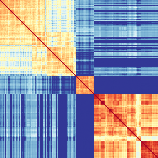

In [11]:
library(gplots)

# svg(file=file.path(DATASET_DIR, "figs/evaluate/dend.svg"))
# plot(dend)
# heatmap.2(distanceMatrix)
# dev.off()

# plot(dend)
# heatmap.2(distanceMatrix, 
#           hclustfun = function(x) hclust(x, method="ward.D"),
#           col="heat.colors")

library(d3heatmap)
d3heatmap(distanceMatrix, distfun=as.dist, 
          hclustfun = function(x) hclust(x, method="ward.D"))

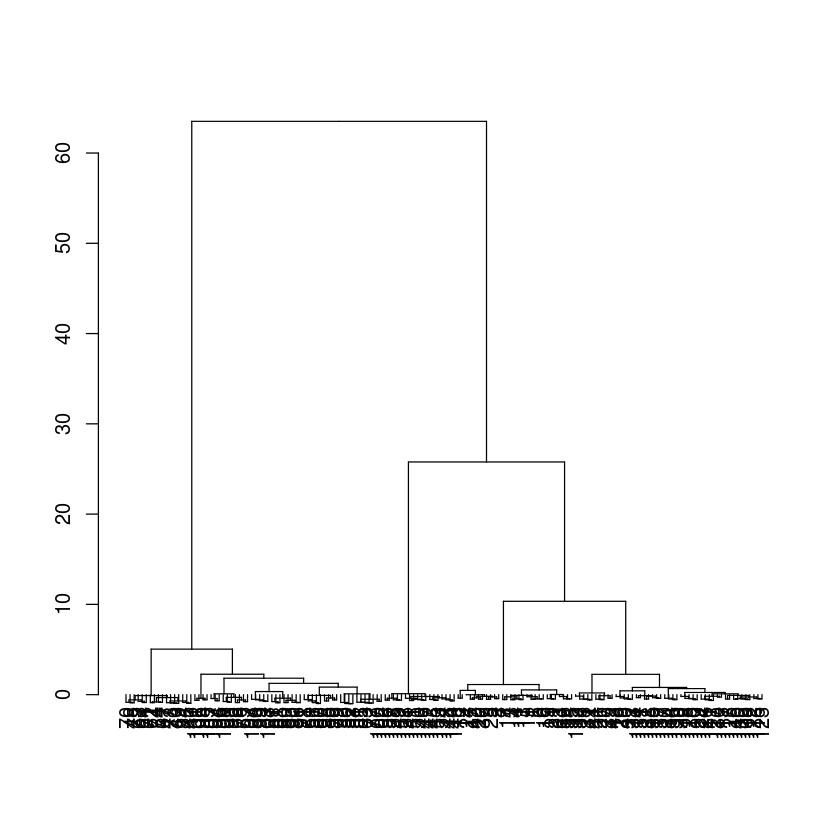

In [12]:
flyTableDistanceMatrix %>% as.dist %>% hclust(method="ward.D") %>% as.dendrogram %>% plot